# Multi-Asset Portfolio Optimization
* This is the implementation of the Modern Portfolio Theory, as known as the Mean-Variance Analysis, introduced by Economist Harry Markowitz.
* The objective is to optimize the expected return for a given level of risk in a portoflio, through adjusting the weights between the asset class inside.
* The model is merely the adoption of the theory and NOT an investment advice. Past performance does not guarantee future trends.

<span style="font-size:16px">Before you start, please download the packages by inputting:</span>

`!pip install numpy`

`!pip install yfinance`

`!pip install scipy`

`!pip install matplotlib`

In [1]:
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
class PortfolioOptimizer:

    def __init__(self, returns, matrix, rf=0.03):  # the default risk-free rate is 3%
        self.returns = returns
        self.matrix = matrix
        self.rf = rf

    def get_portfolio_return(self, weight):
        return weight @ self.returns

    def get_portfolio_vol(self, weight):
        return np.sqrt(weight @ self.matrix @ weight.T)

    def get_portfolio_negative_sharpe_ratio(self, weight):
        port_sr = (self.get_portfolio_return(weight) - self.rf) / self.get_portfolio_vol(weight)
        return -port_sr

<span style="font-size:16px;">Define the date range and stock tickers</span>

In [3]:
start_date = "2024-01-01"
end_date = "2024-06-30"

stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA"]
stocks.sort()

In [4]:
stocks

['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

<span style="font-size:16px;">Download the stock data. We use adjusted closing price here.</span>

In [5]:
data = yf.download(stocks, start=start_date, end=end_date)["Adj Close"]
data

[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2024-01-02 00:00:00+00:00,184.938217,149.929993,137.828705,345.250519,368.854095,48.157665,248.419998
2024-01-03 00:00:00+00:00,183.553467,148.470001,138.576859,343.435944,368.585571,47.558796,238.449997
2024-01-04 00:00:00+00:00,181.222336,144.570007,136.053101,346.078003,365.940002,47.987705,237.929993
2024-01-05 00:00:00+00:00,180.495071,145.240005,135.394745,350.893524,365.751068,49.086464,237.490005
2024-01-08 00:00:00+00:00,184.858521,149.100006,138.497055,357.583374,372.653351,52.241791,240.449997
...,...,...,...,...,...,...,...
2024-06-24 00:00:00+00:00,207.899353,185.570007,178.982498,498.434509,446.864594,118.099899,182.580002
2024-06-25 00:00:00+00:00,208.828293,186.339996,183.786118,510.113373,450.138672,126.079208,187.350006
2024-06-26 00:00:00+00:00,213.003448,193.610001,183.636322,512.630981,451.346497,126.389191,196.369995


<span style="font-size:16px;">Calculate daily returns. Continuous compounding is used here as we are dealing with long-term data and significant price fluctuations.</span>

In [6]:
daily_R = np.log(data) - np.log(data.shift(1))
daily_R = daily_R.dropna()
daily_R

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2024-01-03 00:00:00+00:00,-0.007516,-0.009786,0.005413,-0.005270,-0.000728,-0.012514,-0.040961
2024-01-04 00:00:00+00:00,-0.012781,-0.026619,-0.018380,0.007664,-0.007204,0.008978,-0.002183
2024-01-05 00:00:00+00:00,-0.004021,0.004624,-0.004851,0.013819,-0.000516,0.022638,-0.001851
2024-01-08 00:00:00+00:00,0.023887,0.026230,0.022655,0.018886,0.018696,0.062299,0.012387
2024-01-09 00:00:00+00:00,-0.002266,0.015110,0.015083,-0.003435,0.002931,0.016833,-0.023097
...,...,...,...,...,...,...,...
2024-06-24 00:00:00+00:00,0.003128,-0.018738,-0.002285,0.008313,-0.004702,-0.069179,-0.002352
2024-06-25 00:00:00+00:00,0.004458,0.004141,0.026485,0.023161,0.007300,0.065379,0.025790
2024-06-26 00:00:00+00:00,0.019796,0.038273,-0.000815,0.004923,0.002680,0.002456,0.047022


<span style="font-size:16px;">Calculate annualized returns and covariance matrix</span>

In [7]:
avg_R = daily_R.mean()
avg_R

Ticker
AAPL     0.001048
AMZN     0.002064
GOOGL    0.002256
META     0.003071
MSFT     0.001547
NVDA     0.007659
TSLA    -0.001849
dtype: float64

In [8]:
annual_R = avg_R * 252
annual_R

Ticker
AAPL     0.264040
AMZN     0.520014
GOOGL    0.568522
META     0.774006
MSFT     0.389770
NVDA     1.929949
TSLA    -0.466016
dtype: float64

In [9]:
M = daily_R.cov() * 252
M

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,0.057483,0.014608,0.019330,0.010828,0.016999,0.016317,0.042324
AMZN,0.014608,0.061530,0.035361,0.064229,0.032043,0.053902,0.012823
GOOGL,0.019330,0.035361,0.079522,0.032280,0.030420,0.034764,-0.000722
META,0.010828,0.064229,0.032280,0.164608,0.042930,0.071633,-0.004432
MSFT,0.016999,0.032043,0.030420,0.042930,0.036106,0.041793,0.013409
NVDA,0.016317,0.053902,0.034764,0.071633,0.041793,0.264924,0.006346
TSLA,0.042324,0.012823,-0.000722,-0.004432,0.013409,0.006346,0.276285


<span style="font-size:16px;">Initialize portfolio optimizer</span>

In [10]:
MPT = PortfolioOptimizer(annual_R, M, rf=0.05)  # please set the current risk-free rate here, e.g. 5%

<span style="font-size:16px;">Set the weight. We assume equal weights here, but it will be changed afterwards. You can set whatever weight you want.</span>

In [11]:
no_of_stocks = len(stocks)
W = np.array([1/no_of_stocks] * no_of_stocks)
W

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

<span style="font-size:16px;">Optimization</span>

In [13]:
bounds = tuple((0, 1) for i in range(no_of_stocks))
constraints = ({"type": "eq", "fun": lambda w: np.sum(w) - 1})

result = minimize(
    fun=MPT.get_portfolio_negative_sharpe_ratio,
    x0=W,
    bounds=bounds,
    constraints=constraints
)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.8048231840459334
       x: [ 5.923e-02  0.000e+00  2.848e-01  8.527e-02  0.000e+00
            5.707e-01  9.065e-16]
     nit: 10
     jac: [-1.469e-01  2.162e-02 -1.468e-01 -1.473e-01  7.610e-02
           -1.469e-01  1.551e+00]
    nfev: 82
    njev: 10

In [14]:
ratios = result.x
opt_ratios = [float(round(ratio, 4)) for ratio in ratios]

opt_ratios

[0.0592, 0.0, 0.2848, 0.0853, 0.0, 0.5707, 0.0]

<span style="font-size:16px;">Display optimized weights and Sharpe Ratio</span>

In [17]:
for stock, ratio in zip(stocks, ratios):
    print(f"{stock}: {ratio * 100:.2f}%")

opt_sr = -1*result.fun
print(f"\nOptimized Sharpe Ratio: {opt_sr}")

AAPL: 5.92%
AMZN: 0.00%
GOOGL: 28.48%
META: 8.53%
MSFT: 0.00%
NVDA: 57.07%
TSLA: 0.00%

Optimized Sharpe Ratio: 3.8048231840459334


# Efficient Frontier through Monte Carlo simulation
- We will generate a series of samples (100,000 in this case) of random weight allocations, and try to identify the combination that yields the highest Sharpe Ratio.
- The method relies on random sampling, so the results may vary with each execution and **would not exactly match** the optimized ratio calculated above. Yet, they should be very close to each other.

In [18]:
no_of_samples = 100000
rand_return_list = []
rand_SD_list = []
rand_SR_list = []

In [20]:
for sample in range(no_of_samples):
    rand_weight = np.random.random(no_of_stocks)
    rand_weight /= np.sum(rand_weight)

    rand_return = MPT.get_portfolio_return(rand_weight)
    rand_SD = MPT.get_portfolio_vol(rand_weight)
    rand_SR = -1 * MPT.get_portfolio_negative_sharpe_ratio(rand_weight)  # reverse back

    rand_return_list.append(rand_return)
    rand_SD_list.append(rand_SD)
    rand_SR_list.append(rand_SR)

<span style="font-size:16px;">Find optimal portfolio from simulation</span>

In [21]:
index = np.argmax(rand_SR_list)
opt_weight = rand_SR_list[index]
print(f"Optimized Sharpe Ratio: {opt_weight}")

Optimized Sharpe Ratio: 3.774410521240138


<span style="font-size:16px;">Plotting the Efficient Frontier</span>

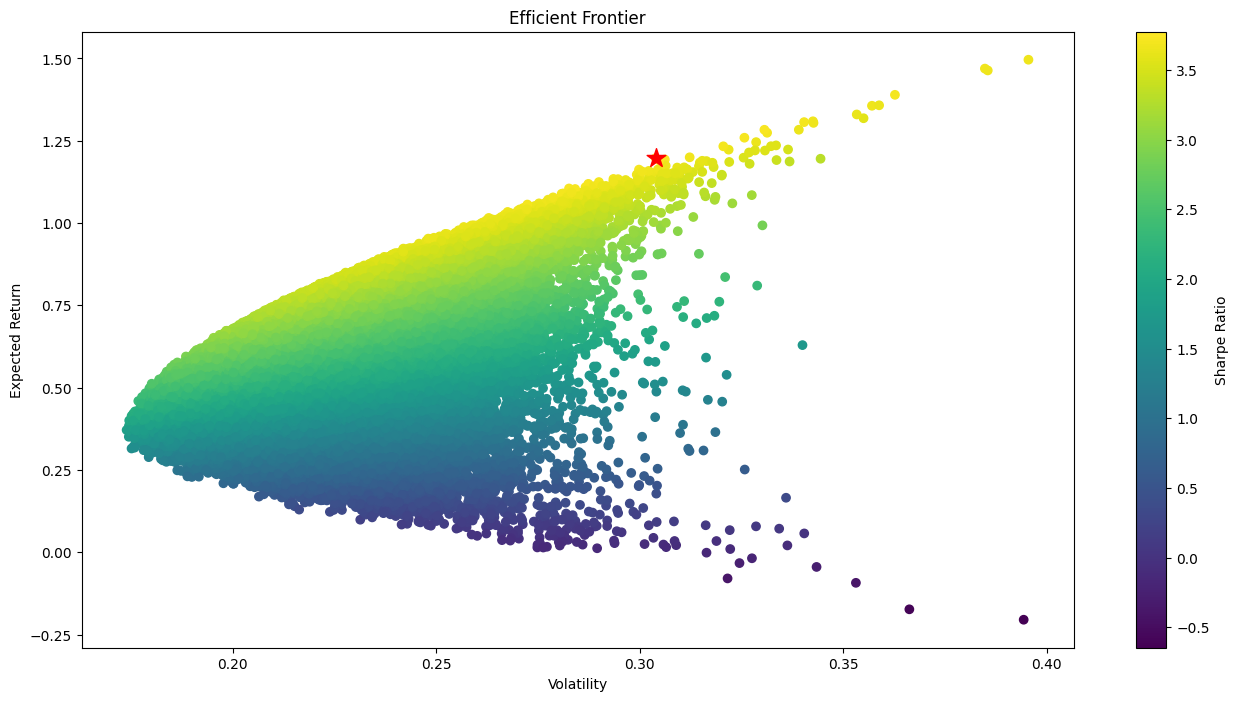

In [22]:
plt.figure(figsize=(16, 8))
plt.scatter(rand_SD_list, rand_return_list, c=rand_SR_list, cmap="viridis", marker="o")

plt.colorbar(label='Sharpe Ratio')
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier")

plt.scatter(rand_SD_list[index], rand_return_list[index], c="red", marker='*', s=200)
plt.show()